In [1]:
import pandas as pd
import numpy as np

In [2]:
# importing the data

results  = pd.read_csv("https://github.com/felipereis150/world_cup/blob/main/data/results.csv?raw=true", parse_dates=['date'])
goalscoers  = pd.read_csv("https://github.com/felipereis150/world_cup/blob/main/data/goalscorers.csv?raw=true", parse_dates=['date'])
shootouts  = pd.read_csv("https://github.com/felipereis150/world_cup/blob/main/data/shootouts.csv?raw=true", parse_dates=['date'])
conf_names = pd.read_csv('https://github.com/felipereis150/world_cup/blob/main/data/confederation_names.csv?raw=true',encoding='ISO-8859-1', sep = ';', engine='python')
cities = pd.read_csv('https://github.com/felipereis150/world_cup/blob/EDA/data/worldcities.csv?raw=true')

In [3]:
# creating a new dataframe with all the data

futebol_df = results.merge(shootouts, on=['home_team', 'away_team'], how='left')
futebol_df = futebol_df.merge(goalscoers, on=['home_team', 'away_team'], how='left')
futebol_df = futebol_df.merge(conf_names, left_on='country', right_on='country', how='left')

In [4]:
# cleaning the data

world_cup = futebol_df[futebol_df['tournament'] == 'FIFA World Cup']
world_cup['year'] = world_cup['date'].dt.year
world_cup['decade'] = world_cup['year'].apply(lambda x: str(x)[2:3] + '0s')
world_cup = world_cup[world_cup['year'] > 1930]
world_cup.reset_index(inplace=True)

C:\Users\felip\AppData\Local\Temp\ipykernel_10152\1846824870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_cup['year'] = world_cup['date'].dt.year
C:\Users\felip\AppData\Local\Temp\ipykernel_10152\1846824870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_cup['decade'] = world_cup['year'].apply(lambda x: str(x)[2:3] + '0s')


In [5]:
# removing duplicates
cities.drop_duplicates(subset=['city_ascii'], inplace=True)

In [6]:
# merging the data

world_cup = world_cup.merge(cities[['city', 'lat', 'lng']], left_on='city', right_on='city', how='left')
world_cup = world_cup.drop(columns=['index', 'date_x', 'neutral', 'date_y', 'own_goal', 'minute', 'penalty'])
world_cup.rename(columns={'acronysm': 'conf', 'lng': 'lon'}, inplace=True)

In [7]:
# checking for null values
world_cup.isna().sum()

home_team                0
away_team                0
home_score               0
away_score               0
tournament               0
city                     0
country                  0
winner                6588
date                     0
team                     0
scorer                   0
conf                   379
confederation name     379
year                     0
decade                   0
lat                    379
lon                    379
dtype: int64

In [8]:
# creating a new column with the winner of the match

world_cup['winner'] = np.where(world_cup['home_score'] > world_cup['away_score'], world_cup['home_team'], world_cup['away_team'])

In [9]:
# cities there was most world cup matches with lat and lon
top_world_cup_cities = world_cup.groupby(['city', 'lat', 'lon']).size().sort_values(ascending=False)
top_world_cup_cities = pd.DataFrame(top_world_cup_cities)
top_world_cup_cities.rename(columns={0: 'N_games'}, inplace=True)
top_world_cup_cities

,,,N_games
city,lat,lon,
Guadalajara,20.6767,-103.3475,275
Montevideo,-34.8667,-56.1667,253
Rio de Janeiro,-22.9083,-43.1964,249
Rosario,-32.9575,-60.6394,202
Mexico City,19.4333,-99.1333,200
...,...,...,...
Seoul,37.5600,126.9900,7
Örebro,59.2669,15.1965,7
Middlesbrough,54.5767,-1.2355,6


In [10]:
# cities there was most world cup matches

top_world_cup_cities_year = world_cup.groupby(['city', 'year']).size().sort_values(ascending=False)
top_world_cup_cities_year = pd.DataFrame(top_world_cup_cities_year)
top_world_cup_cities_year.rename(columns={0: 'N_games'}, inplace=True)
top_world_cup_cities_year = top_world_cup_cities_year.groupby(['city']).cumsum()
top_world_cup_cities_year

N_games
city         year           
Basel        1954.0       52
Al Rayyan    2022.0       51
Doha         2022.0       44
Berne        1954.0       40
Johannesburg 2010.0       40
...                      ...
Orlando      1980.0       48
Nuremberg    1998.0       26
             1990.0       27
Norrköping   1998.0       25
Mendoza      2005.0      117

[1703 rows x 1 columns]

In [11]:
# cities there was most world cup matches

goals_by_team = world_cup.groupby(['year', 'home_team'])['home_score'].sum().reset_index().sort_values(by=['year', 'home_team'])
goals_by_team['cumulative_goals'] = goals_by_team.groupby('home_team')['home_score'].cumsum()
goals_by_team.rename(columns={'home_team': 'team', 'home_score': 'goals'}, inplace=True)
goals_by_team


,year,team,goals,cumulative_goals
0,1934.0,Argentina,10,10
1,1934.0,Austria,51,51
2,1934.0,Belgium,20,20
3,1934.0,Brazil,36,36
4,1934.0,Bulgaria,10,10
...,...,...,...,...
987,2022.0,Switzerland,1,183
988,2022.0,Tunisia,1,14
989,2022.0,United States,2,102
990,2022.0,Uruguay,1,202


In [12]:
# score by team and year
score_by_team = world_cup.groupby(['year', 'home_team'])['home_score'].sum().reset_index().sort_values(by=['year', 'home_team'])
score_by_team.rename(columns={'home_team': 'team', 'home_score': 'goals'}, inplace=True)
score_by_team.sort_values(by=['year', 'goals'], ascending=False)

,year,team,goals
980,2022.0,Portugal,71
964,2022.0,Brazil,60
970,2022.0,England,57
971,2022.0,France,54
986,2022.0,Spain,53
...,...,...,...
0,1934.0,Argentina,10
4,1934.0,Bulgaria,10
11,1934.0,Portugal,9
12,1934.0,Spain,9


<AxesSubplot: title={'center': 'Number of games by confederation per decade'}, xlabel='decade'>

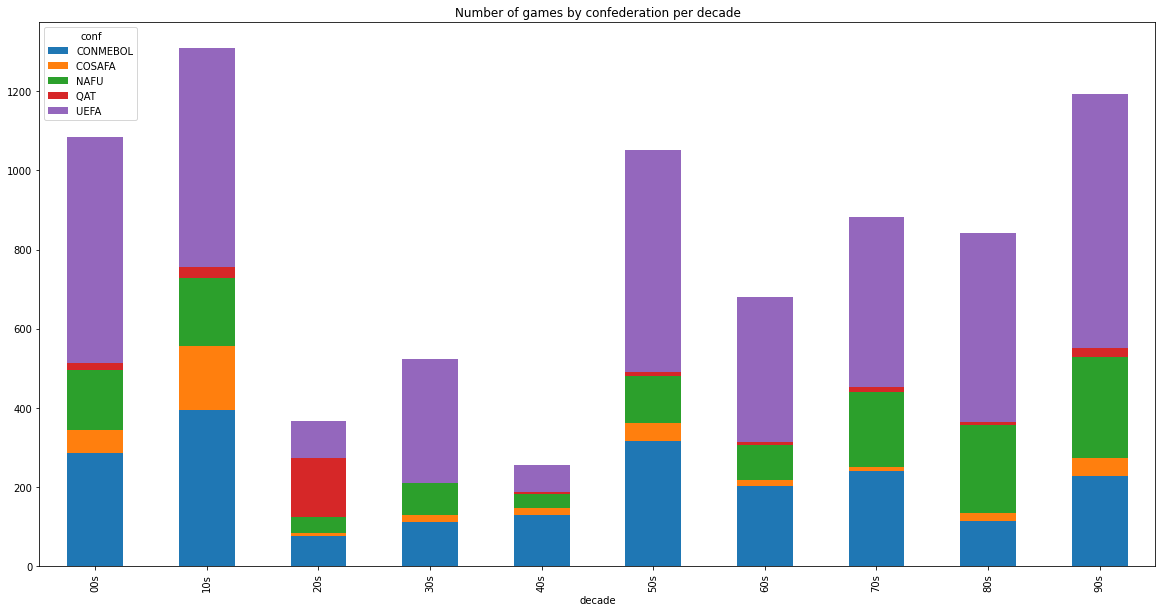

In [13]:
world_cup['conf'].groupby(world_cup['decade']).value_counts().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), title= 'Number of games by confederation per decade')

<AxesSubplot: title={'center': 'Most winning teams'}>

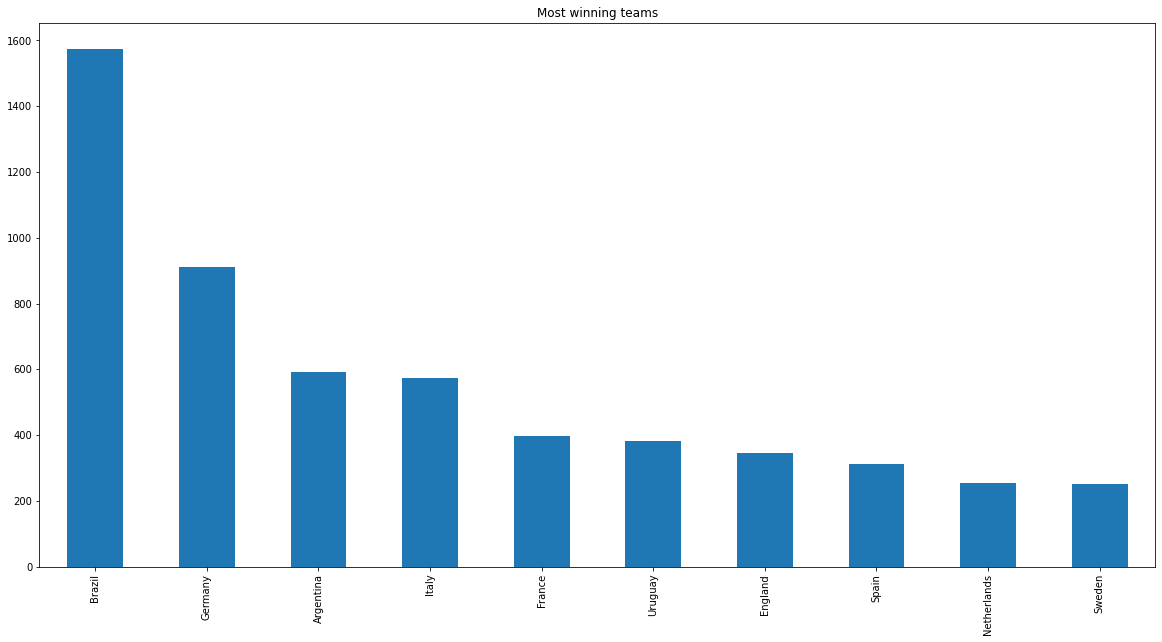

In [14]:
# most winning team
world_cup['winner'].value_counts().head(10).plot(kind='bar', figsize=(20, 10), title= 'Most winning teams')

<AxesSubplot: title={'center': 'Most goalscorers'}>

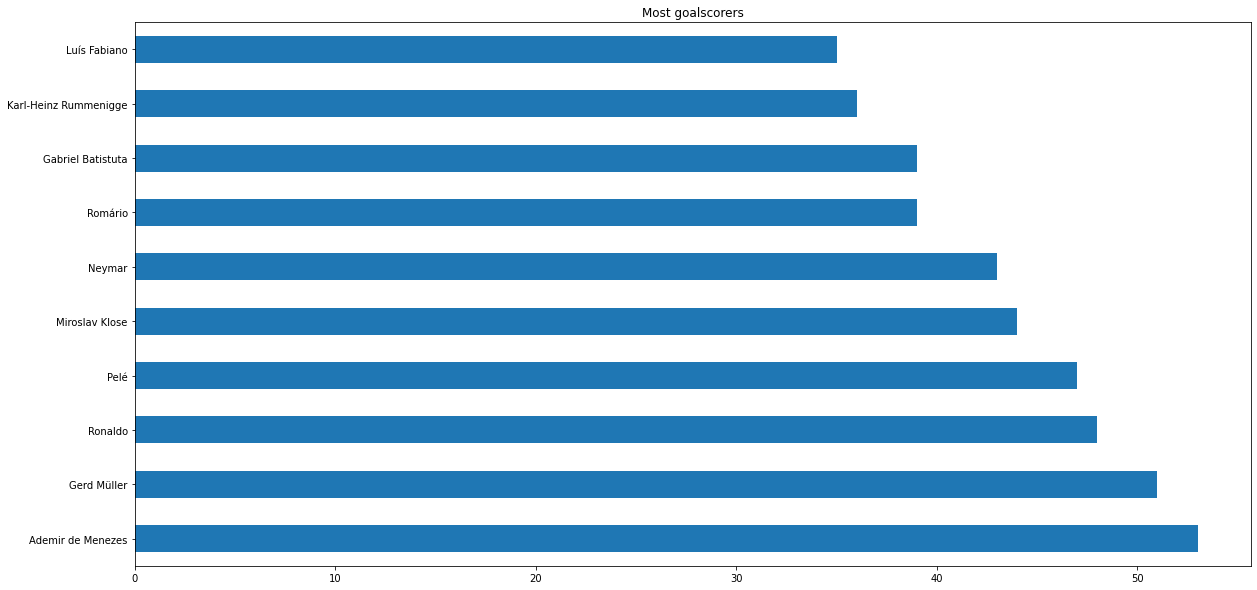

In [15]:
# best scorer
world_cup['scorer'].value_counts().head(10).plot(kind='barh', figsize=(20, 10), title= 'Most goalscorers')

<AxesSubplot: title={'center': 'Most matches per country'}>

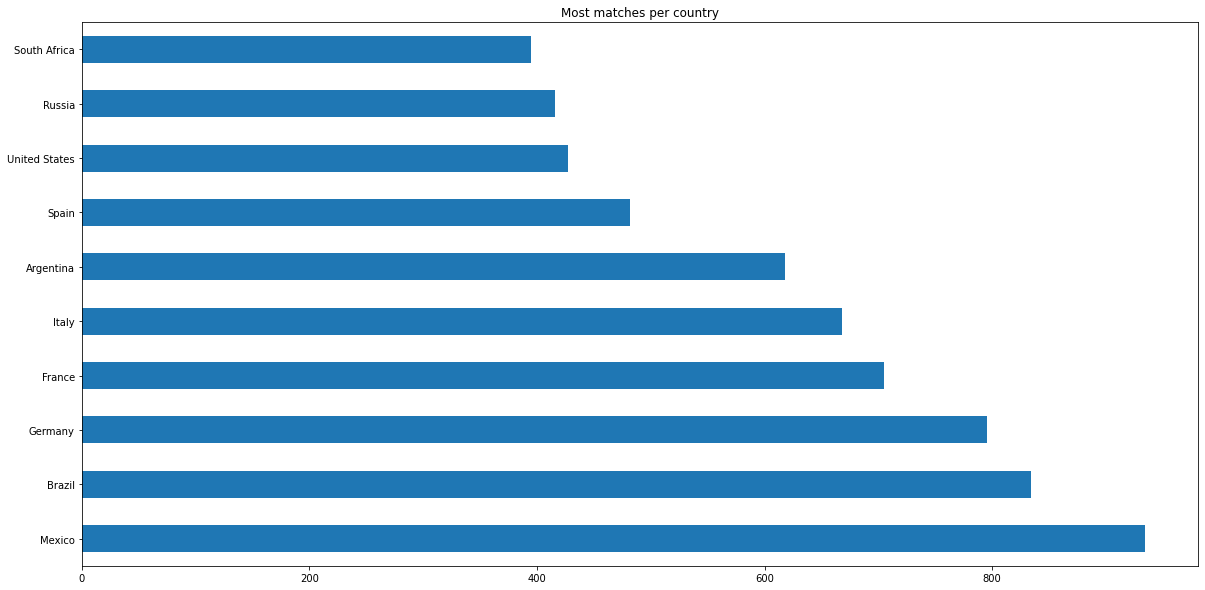

In [16]:
# matches per country
world_cup['country'].value_counts().head(10).plot(kind='barh', figsize=(20, 10), title= 'Most matches per country')

<AxesSubplot: title={'center': 'Cities that hosted most matches'}, ylabel='city'>

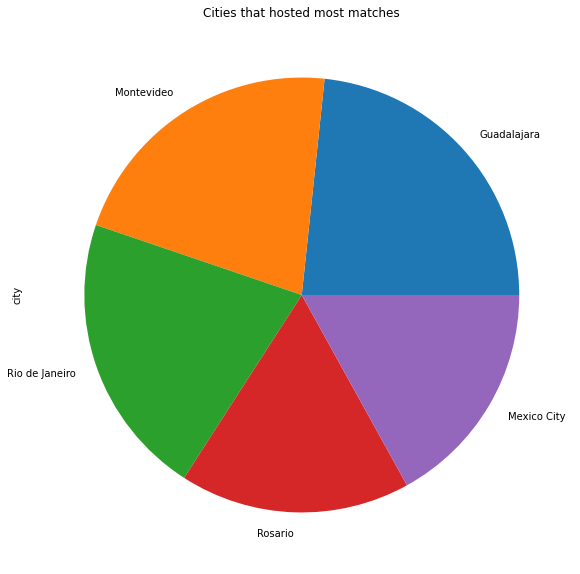

In [17]:
# which cities hosted most matches
world_cup['city'].value_counts().head(5).plot(kind='pie', figsize=(20, 10), title= 'Cities that hosted most matches')